In [1]:
import pandas as pd

In [2]:
train_df=pd.read_csv('nlp_start/train.csv')
test_df=pd.read_csv('nlp_start/test.csv')

In [3]:
train_df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [4]:
train_df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [5]:
train_df.shape

(7613, 5)

In [6]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [7]:
train_shuffle=train_df.sample(frac=1,random_state=49) 
train_shuffle.head(20)

,id,keyword,location,text,target
74,107,accident,North Carolina,I-77 Mile Marker 31 South Mooresville Iredell...,1
5387,7687,panic,Toronto,tomorrow's going to be a year since I went to ...,1
4259,6051,heat%20wave,"Arnhem, the Netherlands",Arnhem Weather - &lt;p&gt;An unrelenting and d...,1
2119,3045,death,Home of the Takers.,Y'all PUSSSSSSSSSY AND SHOOOK TO DEATH OF ME,0
6078,8684,sinkhole,"Haddonfield, NJ",Georgia sinkhole closes road swallows whole po...,1
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1
2118,3044,death,Carry On Jutta!!!,Afghan peace talks in doubt after Mullah Omar'...,0
3931,5589,flood,NaN,Internet basics: the flood defective intertiss...,1
530,770,avalanche,South Central Wales,I saw two great punk bands making original mus...,0
4186,5947,hazard,a van down by the river,@phiddleface NOT IF THERES A CHOKING HAZARD!!!...,0


In [8]:
print(f"Total train samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total  samples: {len(train_df)+len(test_df)}")

Total train samples: 7613
Total test samples: 3263
Total  samples: 10876


In [9]:
import random

random_index=random.randint(0, len(train_df)-4)

for row in train_shuffle[['text','target']][random_index:random_index+4].itertuples():
    print(row)


Pandas(Index=3817, text="Carmike Cinemas on Antioch Shooting: 'We Are Grateful' for Staff and First Responders Safety Is 'Highest Priority' http://t.co/BehfHspPud", target=1)
Pandas(Index=5528, text="Hey @reddit - the concept of a 'quarantine' makes no sense if the people you've quarantined can just wander out &amp; about whenever they want", target=0)
Pandas(Index=5002, text='@UniversityofLaw For the people who died in Human Experiments by Unit 731 of Japanese military http://t.co/vVPLFQv58P http://t.co/eG1fsKqBv6', target=1)
Pandas(Index=3274, text="[Question] Is anybody else having this problem with the '7' circle in Epicentre? http://t.co/dsPWS6hJ8w", target=0)


In [10]:
from sklearn.model_selection import train_test_split

train_sentences, test_sentences, train_labels,test_labels = train_test_split(
    train_shuffle['text'].to_numpy(),
    train_shuffle['target'].to_numpy(),
    test_size=0.1, 
    random_state=49
)

In [11]:
train_sentences.dtype, train_labels.dtype

(dtype('O'), dtype('int64'))

In [12]:
len(train_sentences), len(test_sentences)

(6851, 762)

In [13]:
import tensorflow as tf 
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [14]:
text_vectorizer = TextVectorization(max_tokens=10000, 
                                    standardize="lower_and_strip_punctuation", 
                                    output_sequence_length=15)

In [15]:
text_vectorizer.adapt(train_sentences)

In [16]:
sample_sentense="I Love Tensorflow"

text_vectorizer([sample_sentense])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  8, 107,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=int64)>

In [17]:
words = text_vectorizer.get_vocabulary()



In [18]:
from tensorflow.keras.layers import Embedding

In [19]:
embedding = Embedding(
                        input_dim=10000, 
                        output_dim=128, 
                        input_length=15, 
                        name = 'embeding_1'
)

In [20]:
embedding

In [21]:
sample_embed = embedding(text_vectorizer("I Love Tensorflow"))
sample_embed

<tf.Tensor: shape=(15, 128), dtype=float32, numpy=
array([[ 2.8813109e-03,  4.4097628e-02, -4.3034650e-02, ...,
        -1.0604132e-02,  4.9953628e-02, -4.6670463e-02],
       [ 1.3964605e-02, -1.8539976e-02,  4.4621263e-02, ...,
         4.2849366e-02,  8.6563714e-03, -2.0793056e-02],
       [-1.1302345e-03, -4.8826136e-02,  6.5147877e-05, ...,
         1.2590971e-02, -2.6265740e-02, -1.5648387e-02],
       ...,
       [ 2.4784673e-02,  2.8914217e-02,  3.1612646e-02, ...,
         4.0070508e-02,  3.8226847e-02,  4.0347423e-02],
       [ 2.4784673e-02,  2.8914217e-02,  3.1612646e-02, ...,
         4.0070508e-02,  3.8226847e-02,  4.0347423e-02],
       [ 2.4784673e-02,  2.8914217e-02,  3.1612646e-02, ...,
         4.0070508e-02,  3.8226847e-02,  4.0347423e-02]], dtype=float32)>

#### finish previous lection

------------------------------------------------------------------------------------------------


## Lection 3 start

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

C:\Users\38068\.conda\envs\tutorialspoint\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [24]:
model_0= Pipeline([ 
    ("tfidf",TfidfVectorizer()), 
    ("clf", MultinomialNB())
])

In [25]:
model_0.fit(train_sentences,train_labels)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [26]:
baseline_score= model_0.score(test_sentences,test_labels)

baseline_score

0.8097112860892388

In [27]:
y_hat0=model_0.predict(test_sentences)

In [28]:
test_labels[:10], y_hat0[:10]

(array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64))

In [29]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [30]:
calculate_results(test_labels,y_hat0)

{'accuracy': 80.97112860892388,
 'precision': 0.8184785838596061,
 'recall': 0.8097112860892388,
 'f1': 0.8032877870568117}

In [31]:
test_sentences.dtype

dtype('O')

In [32]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_1 = tf.keras.Model(inputs,outputs,name="model_1_dense")


In [33]:
model_1.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["accuracy"]
)

In [34]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embeding_1 (Embedding)       (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [35]:
model_1_history = model_1.fit(train_sentences, train_labels, 
                                epochs=5, 
                                validation_data=(test_sentences,test_labels))

Epoch 1/5
215/215 [==============================] - 8s 32ms/step - loss: 0.6130 - accuracy: 0.6996 - val_loss: 0.5231 - val_accuracy: 0.7546
Epoch 2/5
215/215 [==============================] - 5s 24ms/step - loss: 0.4460 - accuracy: 0.8165 - val_loss: 0.4449 - val_accuracy: 0.8005
Epoch 3/5
215/215 [==============================] - 3s 16ms/step - loss: 0.3516 - accuracy: 0.8572 - val_loss: 0.4252 - val_accuracy: 0.8097
Epoch 4/5
215/215 [==============================] - 3s 16ms/step - loss: 0.2876 - accuracy: 0.8897 - val_loss: 0.4288 - val_accuracy: 0.8045
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.2401 - accuracy: 0.9115 - val_loss: 0.4445 - val_accuracy: 0.7979


In [36]:
model_1.evaluate(test_sentences,test_labels)

24/24 [==============================] - 0s 1ms/step - loss: 0.4445 - accuracy: 0.7979


[0.44448667764663696, 0.7979002594947815]

In [37]:
res_model_1=pd.DataFrame(model_1_history.history)

<AxesSubplot:>

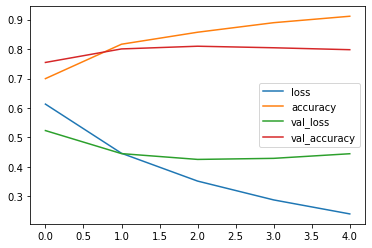

In [38]:
res_model_1.plot()

In [39]:
test_labels.shape

(762,)

In [40]:
y_hat1=model_1.predict(test_sentences)

In [41]:
y_hat1=tf.squeeze(tf.round(y_hat1))

In [42]:
test_labels

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [43]:
calculate_results(test_labels,y_hat1)

{'accuracy': 79.79002624671917,
 'precision': 0.796884956031734,
 'recall': 0.7979002624671916,
 'f1': 0.7970312405479758}

In [44]:
calculate_results(test_labels,y_hat0)

{'accuracy': 80.97112860892388,
 'precision': 0.8184785838596061,
 'recall': 0.8097112860892388,
 'f1': 0.8032877870568117}

#### finish previous lection

------------------------------------------------------------------------------------------------


## Lection 4 start

In [48]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.LSTM(64)(x)
print(x.shape)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_2 = tf.keras.Model(inputs,outputs,name="model_2_LSTM")

(None, 15, 128)
(None, 64)


In [49]:
model_2.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["accuracy"]
)

In [50]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embeding_1 (Embedding)       (None, 15, 128)           1280000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [51]:
model_2_history = model_2.fit(
                                train_sentences,train_labels, 
                                epochs=5, 
                                validation_data=(test_sentences,test_labels)
)

Epoch 1/5
215/215 [==============================] - 21s 66ms/step - loss: 0.2218 - accuracy: 0.9213 - val_loss: 0.5440 - val_accuracy: 0.7900
Epoch 2/5
215/215 [==============================] - 7s 35ms/step - loss: 0.1546 - accuracy: 0.9429 - val_loss: 0.5443 - val_accuracy: 0.7887
Epoch 3/5
215/215 [==============================] - 7s 34ms/step - loss: 0.1250 - accuracy: 0.9548 - val_loss: 0.6047 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 7s 34ms/step - loss: 0.1044 - accuracy: 0.9619 - val_loss: 0.7837 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0843 - accuracy: 0.9682 - val_loss: 0.9011 - val_accuracy: 0.7638


In [52]:
model_2.evaluate(test_sentences,test_labels)

24/24 [==============================] - 0s 9ms/step - loss: 0.9011 - accuracy: 0.7638


[0.9010712504386902, 0.7637795209884644]

In [69]:
y_hat2=model_2.predict(test_sentences)

y_hat2[:10]

array([[9.9973679e-01],
       [9.6076965e-01],
       [2.2244453e-04],
       [2.1279842e-02],
       [9.6150613e-01],
       [7.7319300e-01],
       [1.5155673e-02],
       [7.2402501e-01],
       [7.3642099e-01],
       [9.9989140e-01]], dtype=float32)

In [70]:
y_hat2=tf.squeeze(tf.round(y_hat2))

y_hat2

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0

In [71]:
calculate_results(test_labels,y_hat2),calculate_results(test_labels,y_hat1),calculate_results(test_labels,y_hat0)

({'accuracy': 75.19685039370079,
  'precision': 0.7537866213417407,
  'recall': 0.7519685039370079,
  'f1': 0.752657817497726},
 {'accuracy': 79.79002624671917,
  'precision': 0.796884956031734,
  'recall': 0.7979002624671916,
  'f1': 0.7970312405479758},
 {'accuracy': 80.97112860892388,
  'precision': 0.8184785838596061,
  'recall': 0.8097112860892388,
  'f1': 0.8032877870568117})

In [60]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.GRU(64)(x)
print(x.shape)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_3 = tf.keras.Model(inputs,outputs,name="model_3_GRU")

(None, 15, 128)
(None, 64)


In [61]:
model_3.compile(loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["accuracy"]
)

In [62]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embeding_1 (Embedding)       (None, 15, 128)           1280000   
_________________________________________________________________
gru (GRU)                    (None, 64)                37248     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_________________________________________________________________


In [63]:
model_3.fit(train_sentences,train_labels, 
            epochs=5, 
            validation_data=(test_sentences,test_labels)           

)

Epoch 1/5
215/215 [==============================] - 14s 37ms/step - loss: 0.1550 - accuracy: 0.9410 - val_loss: 0.7295 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 7s 32ms/step - loss: 0.0840 - accuracy: 0.9712 - val_loss: 0.8212 - val_accuracy: 0.7638
Epoch 3/5
215/215 [==============================] - 7s 31ms/step - loss: 0.0709 - accuracy: 0.9711 - val_loss: 0.9029 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 8s 39ms/step - loss: 0.0572 - accuracy: 0.9759 - val_loss: 1.2719 - val_accuracy: 0.7559
Epoch 5/5
215/215 [==============================] - 7s 34ms/step - loss: 0.0519 - accuracy: 0.9768 - val_loss: 1.0546 - val_accuracy: 0.7703


In [65]:
model_3.evaluate(test_sentences,test_labels)

24/24 [==============================] - 0s 7ms/step - loss: 1.0546 - accuracy: 0.7703


[1.0545679330825806, 0.7703412175178528]

In [66]:
y_hat3 = model_3.predict(test_sentences)

y_hat3[:10]

array([[9.9963140e-01],
       [9.2197776e-01],
       [3.4859266e-05],
       [8.7023973e-03],
       [8.7375605e-01],
       [9.2922151e-02],
       [1.2669355e-02],
       [7.4748665e-02],
       [6.9819689e-02],
       [9.9987853e-01]], dtype=float32)

In [72]:
y_hat3=tf.squeeze(tf.round(y_hat3))

y_hat3

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0

In [74]:
calculate_results(test_labels,y_hat3)

{'accuracy': 77.03412073490814,
 'precision': 0.768802522378248,
 'recall': 0.7703412073490814,
 'f1': 0.7688496509497209}

In [93]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.Bidirectional(layers.LSTM(16))(x)
print(x.shape)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_4 = tf.keras.Model(inputs,outputs,name="model_4_Bidirectional_LSTM")

(None, 15, 128)
(None, 32)


In [94]:
model_4.compile(loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["accuracy"]
)

In [95]:
model_4.summary()

Model: "model_4_Bidirectional_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embeding_1 (Embedding)       (None, 15, 128)           1280000   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 32)                18560     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 1,298,593
Trainable params: 1,298,593
Non-trainable params: 0
_________________________________________________________________


In [96]:
model_4.fit(train_sentences,train_labels,epochs=5, 
validation_data=(test_sentences,test_labels))

Epoch 1/5
215/215 [==============================] - 13s 39ms/step - loss: 0.1616 - accuracy: 0.9616 - val_loss: 0.8539 - val_accuracy: 0.7388
Epoch 2/5
215/215 [==============================] - 7s 34ms/step - loss: 0.0505 - accuracy: 0.9813 - val_loss: 0.9941 - val_accuracy: 0.7441
Epoch 3/5
215/215 [==============================] - 7s 34ms/step - loss: 0.0408 - accuracy: 0.9813 - val_loss: 1.1811 - val_accuracy: 0.7402
Epoch 4/5
215/215 [==============================] - 7s 33ms/step - loss: 0.0378 - accuracy: 0.9819 - val_loss: 1.1512 - val_accuracy: 0.7598
Epoch 5/5
215/215 [==============================] - 7s 34ms/step - loss: 0.0370 - accuracy: 0.9818 - val_loss: 1.2813 - val_accuracy: 0.7507


In [97]:
model_4.evaluate(test_sentences,test_labels)

24/24 [==============================] - 0s 4ms/step - loss: 1.2813 - accuracy: 0.7507


[1.2812600135803223, 0.7506561875343323]

In [90]:
y_hat4 = model_4.predict(test_sentences)

In [98]:
y_hat4=tf.squeeze(tf.round(y_hat4))

y_hat4[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 0., 1., 1., 0., 0., 1., 1.], dtype=float32)>

In [99]:
calculate_results(test_labels,y_hat4)

{'accuracy': 74.54068241469817,
 'precision': 0.7445414137474303,
 'recall': 0.7454068241469817,
 'f1': 0.7448908060058007}